In [ ]:
delhivery_project_casestudy

In [238]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats import ttest_ind, mannwhitneyu


In [239]:
#The code is aimed at preprocessing a dataset that includes time-based information:

#Loading the data from a CSV file.
#Checking for and handling missing values, especially in time-related columns.
#time strings into a format (timedelta) suitable for time-based computations.

In [240]:
# Read the CSV file
df = pd.read_csv('delhivery_data.csv')

# Check for missing values
print("Missing values count:\n", df.isnull().sum())
print("Missing values count (na):\n", df.isna().sum())


df=df.dropna()
# List of time columns (ensure these column names match your actual column names)
time_columns = ['od_start_time', 'od_end_time', 'trip_creation_time']

# Handle missing values in time columns  # Dropping rows with missing time values
# Alternatively, you could fill missing values if appropriate:
# df[time_columns] = df[time_columns].fillna('00:00.0')

def time_to_timedelta(time_str):
    if pd.isna(time_str):
        return pd.NaT  # Or handle missing values if needed
    minutes, seconds = time_str.split(':')
    minutes = int(minutes)
    seconds = float(seconds)
    return timedelta(minutes=minutes, seconds=seconds)

# Convert time columns to timedelta
for col in time_columns:
    df[col] = df[col].apply(time_to_timedelta)

print(df.info())
print(df.describe())
print(df.shape)
df

Missing values count:
 data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64
Missing values count (na):
 data                    

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,0 days 00:35:36.500000,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),0 days 00:21:32.400000,...,20-09-2018 04:27,10.435660,14,11,11.9653,1.272727,14,11,11.9653,1.272727
1,training,0 days 00:35:36.500000,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),0 days 00:21:32.400000,...,20-09-2018 04:17,18.936842,24,20,21.7243,1.200000,10,9,9.7590,1.111111
2,training,0 days 00:35:36.500000,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),0 days 00:21:32.400000,...,01:19.5,27.637279,40,28,32.5395,1.428571,16,7,10.8152,2.285714
3,training,0 days 00:35:36.500000,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),0 days 00:21:32.400000,...,20-09-2018 03:39,36.118028,62,40,45.5620,1.550000,21,12,13.0224,1.750000
4,training,0 days 00:35:36.500000,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),0 days 00:21:32.400000,...,20-09-2018 03:33,39.386040,68,44,54.2181,1.545455,6,5,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,0 days 00:24:28.400000,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),0 days 00:24:28.400000,...,20-09-2018 21:57,45.258278,94,60,67.9280,1.566667,12,12,8.1858,1.000000
144863,training,0 days 00:24:28.400000,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),0 days 00:24:28.400000,...,20-09-2018 21:31,54.092531,120,76,85.6829,1.578947,26,21,17.3725,1.238095
144864,training,0 days 00:24:28.400000,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),0 days 00:24:28.400000,...,20-09-2018 21:11,66.163591,140,88,97.0933,1.590909,20,34,20.7053,0.588235
144865,training,0 days 00:24:28.400000,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),0 days 00:24:28.400000,...,20-09-2018 20:53,73.680667,158,98,111.2709,1.612245,17,27,18.8885,0.629630


In [241]:
#Grouping and Aggregating Data: You create a segment_key to group related rows together, compute cumulative sums for segment-specific columns, 
#and then aggregate these segments using a defined dictionary of functions.
#Sorting: Finally, you sort the aggregated data to ensure it is logically ordered by segment and time.

In [242]:
# Step 1a: Create a unique identifier for segments
df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']

# Step 1b: Calculate cumulative sums for relevant columns
df['segment_actual_time_sum'] = df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum'] = df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum'] = df.groupby('segment_key')['segment_osrm_time'].cumsum()

# Step 2a: Create an aggregation dictionary
create_segment_dict = {
    'data': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'trip_uuid': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'first',
    'destination_name': 'first',
    'is_cutoff': 'first',
    'cutoff_factor': 'first',
    'cutoff_timestamp': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'trip_creation_time' : 'first',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'factor': 'mean',
    'segment_actual_time_sum': 'last',
    'segment_osrm_distance_sum': 'last',
    'segment_osrm_time_sum': 'last',
    'segment_factor': 'mean',
    'start_scan_to_end_scan': 'sum'
}

# Step 2b: Group by segment_key and apply aggregation
df_segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()

# Step 2c: Sort by segment_key and od_end_time
df_segment = df_segment.sort_values(by=['segment_key', 'od_end_time'])

# Display the resulting DataFrame
df_segment

,segment_key,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,is_cutoff,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,segment_factor,start_scan_to_end_scan
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),True,...,3778.765471,6484,3464,4540.1261,1.741964,728,670.6205,534,1.893007,22680
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),True,...,5082.046634,9198,4323,6037.6386,2.150702,820,649.8528,474,2.134213,20979
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),True,...,53.310332,96,55,60.3157,1.746424,46,28.1995,26,1.795767,174
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),True,...,186.897974,303,155,209.1151,1.875977,95,55.9899,39,2.912963,732
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),True,...,1725.590250,2601,1427,1975.7409,1.737898,608,317.7408,231,2.326577,10008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),True,...,88.326510,119,106,106.7084,1.058703,49,42.1431,42,1.164904,248
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),True,...,90.049767,173,108,111.8555,1.484063,89,78.5869,77,1.233981,364
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),True,...,21.672374,51,22,25.5371,2.383929,29,16.0184,14,1.979167,88
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,test,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),True,...,62.547507,278,59,76.5169,4.097339,233,52.5303,42,5.083529,574


In [ ]:
#Time Difference Calculation: Convert time columns to timedelta, compute the difference, and create a new feature in hours.
#Destination Name Parsing: Split destination_name into city, place, code, and state components.
#Source Name Parsing: Similar parsing for source_name.
#Trip Creation Date Extraction: Extract date and time components from trip_creation_time.

In [243]:
# 1. Calculate time difference in hours
def convert_to_timedelta(time_str):
    return pd.to_timedelta(time_str)

df_segment['od_start_time_td'] = df_segment['od_start_time'].apply(convert_to_timedelta)
df_segment['od_end_time_td'] = df_segment['od_end_time'].apply(convert_to_timedelta)

# Calculate difference in hours
df_segment['od_time_diff_hour'] = (df_segment['od_end_time_td'] - df_segment['od_start_time_td']).dt.total_seconds() / 3600

# Drop temporary time columns if they exist
columns_to_drop = ['od_start_time_td', 'od_end_time_td', 'od_start_time', 'od_end_time']
df_segment.drop(columns=[col for col in columns_to_drop if col in df_segment.columns], inplace=True)

df_segment



,segment_key,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,is_cutoff,...,actual_time,osrm_time,osrm_distance,factor,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,segment_factor,start_scan_to_end_scan,od_time_diff_hour
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),True,...,6484,3464,4540.1261,1.741964,728,670.6205,534,1.893007,22680,0.010056
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),True,...,9198,4323,6037.6386,2.150702,820,649.8528,474,2.134213,20979,0.658444
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),True,...,96,55,60.3157,1.746424,46,28.1995,26,1.795767,174,-0.019472
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),True,...,303,155,209.1151,1.875977,95,55.9899,39,2.912963,732,0.046333
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),True,...,2601,1427,1975.7409,1.737898,608,317.7408,231,2.326577,10008,-0.089361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),True,...,119,106,106.7084,1.058703,49,42.1431,42,1.164904,248,0.035250
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),True,...,173,108,111.8555,1.484063,89,78.5869,77,1.233981,364,0.518139
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),True,...,51,22,25.5371,2.383929,29,16.0184,14,1.979167,88,-0.263750
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,test,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),True,...,278,59,76.5169,4.097339,233,52.5303,42,5.083529,574,-0.208750


In [244]:
df_segment[['destination_city', 'destination_place', 'destination_code', 'destination_state']] = df_segment['destination_name'].str.extract(r'(.+?)_(.+?)_(.+?) \((.+?)\)')

# 3. Split and extract features from source_name
df_segment[['source_city', 'source_place', 'source_code', 'source_state']] = df_segment['source_name'].str.extract(r'(.+?)_(.+?)_(.+?) \((.+?)\)')

# Drop original name columns if they exist
df_segment.drop(columns=['destination_name', 'source_name'], inplace=True)

# 4. Extract features from trip_creation_time
def extract_time_features(time_str):
    time_td = convert_to_timedelta(time_str)
    days = time_td.days
    hours, remainder = divmod(time_td.seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return pd.Series([days, hours, minutes, seconds], index=['days', 'hours', 'minutes', 'seconds'])

df_segment[['days', 'hours', 'minutes', 'seconds']] = df_segment['trip_creation_time'].apply(extract_time_features)

# Drop original trip_creation_time column if it exists
if 'trip_creation_time' in df_segment.columns:
    df_segment.drop(columns=['trip_creation_time'], inplace=True)

df_segment.columns
df_segment

,segment_key,data,route_schedule_uuid,route_type,trip_uuid,source_center,destination_center,is_cutoff,cutoff_factor,cutoff_timestamp,...,destination_code,destination_state,source_city,source_place,source_code,source_state,days,hours,minutes,seconds
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,IND000000ACB,True,22,13-09-2018 12:40,...,HB,Haryana,Kanpur,Central,H_6,Uttar Pradesh,0,0,0,16
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,IND209304AAA,True,22,12-09-2018 14:56,...,H_6,Uttar Pradesh,Bhopal,Trnsport,H,Madhya Pradesh,0,0,0,16
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,IND562101AAA,True,9,12-09-2018 02:41,...,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,0,0,0,22
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,IND561203AAB,True,9,12-09-2018 01:39,...,D,Karnataka,Tumkur,Veersagr,I,Karnataka,0,0,0,22
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,IND160002AAC,True,22,14-09-2018 16:54,...,H,Punjab,Gurgaon,Bilaspur,HB,Haryana,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069_IND628204AAA_IND627657AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,IND627657AAA,True,9,04-10-2018 03:17,...,D,Tamil Nadu,Tirchchndr,Shnmgprm,D,Tamil Nadu,0,0,59,14
26218,trip-153861115439069069_IND628613AAA_IND627005AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,IND627005AAA,True,9,04-10-2018 05:32,...,I,Tamil Nadu,Peikulam,SriVnktpm,D,Tamil Nadu,0,0,59,14
26219,trip-153861115439069069_IND628801AAA_IND628204AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,IND628204AAA,True,9,04-10-2018 02:05,...,D,Tamil Nadu,Eral,Busstand,D,Tamil Nadu,0,0,59,14
26220,trip-153861118270144424_IND583119AAA_IND583101AAA,test,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,IND583101AAA,True,22,04-10-2018 07:29,...,NaN,NaN,Sandur,WrdN1DPP,D,Karnataka,0,0,59,42


In [ ]:
Grouping and Aggregating: Combine data at the trip level and compute summary statistics.
Outlier Detection: Identify and manage outliers using visualization and statistical methods.
One-Hot Encoding: Convert categorical features into a numerical format suitable for modeling.
Normalization/Standardization: Scale numerical features to improve model performance and ensure consistent units.

Trip-level Aggregated DataFrame:
                 trip_uuid      data  \
0  trip-153671041653548748  training   
1  trip-153671042288605164  training   
2  trip-153671043369099517  training   
3  trip-153671046011330457  training   
4  trip-153671052974046625  training   

                                 route_schedule_uuid route_type source_center  \
0  thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...        FTL  IND209304AAA   
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting  IND561203AAB   
2  thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...        FTL  IND000000ACB   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL  IND583101AAA   

  destination_center  is_cutoff  cutoff_factor  cutoff_timestamp  \
0       IND000000ACB       True             22  13-09-2018 12:40   
1       IND562101AAA       True              9  12-09-2018 02:41   
2       IND160002AAC       True    

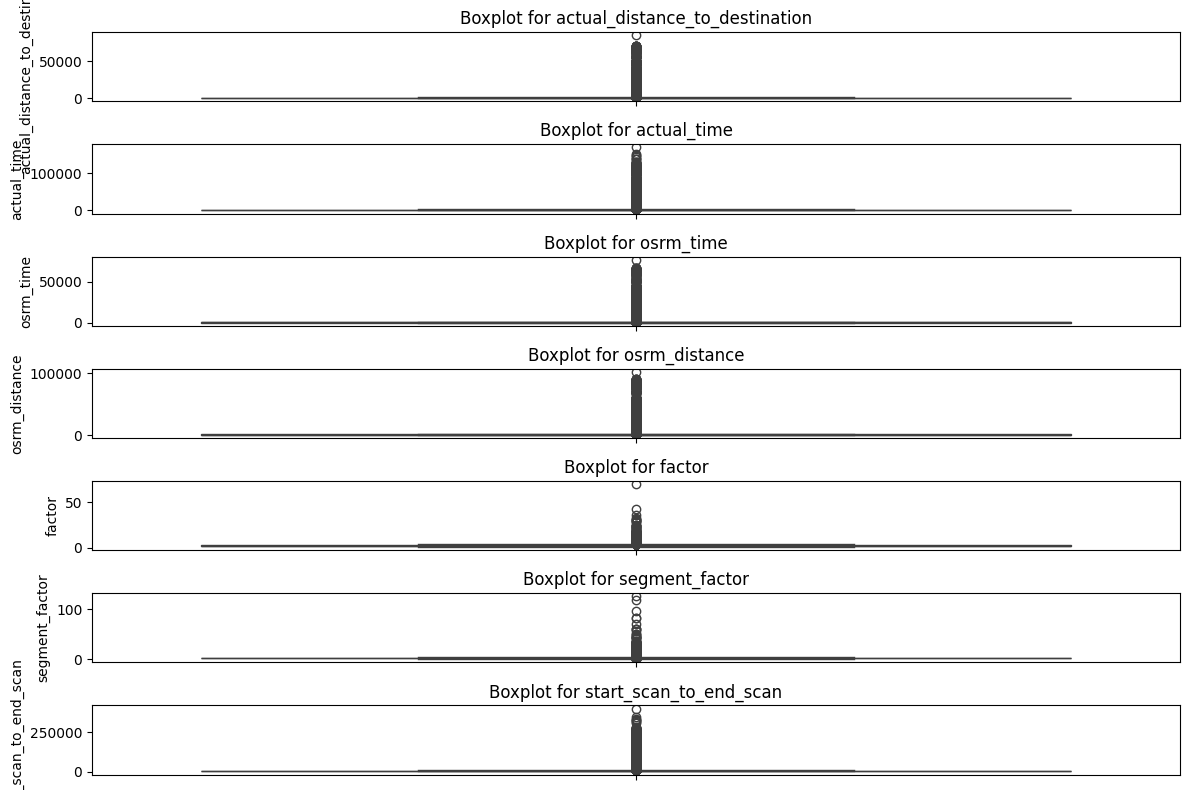

DataFrame After Outlier Removal:
                 trip_uuid      data  \
1  trip-153671042288605164  training   
3  trip-153671046011330457  training   
4  trip-153671052974046625  training   
5  trip-153671055416136166  training   
6  trip-153671066201138152  training   

                                 route_schedule_uuid route_type source_center  \
1  thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...    Carting  IND561203AAB   
3  thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...    Carting  IND400072AAB   
4  thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...        FTL  IND583101AAA   
5  thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...    Carting  IND600056AAA   
6  thanos::sroute:a97698cc-846e-41a7-916b-88b1741...    Carting  IND600044AAD   

  destination_center  is_cutoff  cutoff_factor  cutoff_timestamp  \
1       IND562101AAA       True              9  12-09-2018 02:41   
3       IND401104AAA       True              9  12-09-2018 01:13   
4       IND583201AAA       True    

In [245]:
create_trip_dict = {
    'data': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'source_center': 'first',
    'destination_center': 'first',
    'is_cutoff': 'first',
    'cutoff_factor': 'first',
    'cutoff_timestamp': 'first',
    'actual_distance_to_destination': 'sum',  # Sum up the distances
    'actual_time': 'sum',  # Sum up the time
    'osrm_time': 'sum',  # Sum up the OSRM time
    'osrm_distance': 'sum',  # Sum up the OSRM distance
    'factor': 'mean',  # Take the average factor
    'segment_actual_time_sum': 'last',  # Last value of cumulative actual time
    'segment_osrm_distance_sum': 'last',  # Last value of cumulative OSRM distance
    'segment_osrm_time_sum': 'last',  # Last value of cumulative OSRM time
    'segment_factor': 'mean',  # Average segment factor
    'start_scan_to_end_scan': 'sum'  # Sum of scan times
}

# Group by 'trip_uuid' and apply the aggregation functions
df_trip = df_segment.groupby('trip_uuid').agg(create_trip_dict).reset_index()

# Display the aggregated DataFrame
print("Trip-level Aggregated DataFrame:")
print(df_trip.head())

# Step 2: Outlier Detection & Treatment

# Numerical columns for outlier detection
numerical_cols = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_factor', 'start_scan_to_end_scan']

# Boxplot to visualize outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(df_trip[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

# Handle outliers using the IQR method
for col in numerical_cols:
    Q1 = df_trip[col].quantile(0.25)
    Q3 = df_trip[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_trip = df_trip[(df_trip[col] >= lower_bound) & (df_trip[col] <= upper_bound)]

# Display the cleaned DataFrame
print("DataFrame After Outlier Removal:")
print(df_trip.head())

# Step 3: Perform One-Hot Encoding on Categorical Features

# Categorical columns for one-hot encoding
categorical_cols = ['data', 'route_schedule_uuid', 'route_type', 'source_center', 'destination_center', 'is_cutoff']

# Perform one-hot encoding
df_trip_encoded = pd.get_dummies(df_trip, columns=categorical_cols)

# Display the encoded DataFrame
print("One-Hot Encoded DataFrame:")
print(df_trip_encoded.head())

# Step 4: Normalize/Standardize the Numerical Features

# Normalize Using MinMaxScaler
numerical_features = ['actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_factor', 'start_scan_to_end_scan']

# Apply MinMaxScaler
min_max_scaler = MinMaxScaler()
df_trip_encoded[numerical_features] = min_max_scaler.fit_transform(df_trip_encoded[numerical_features])

# Display the normalized DataFrame
print("Normalized DataFrame using MinMaxScaler:")
print(df_trip_encoded.head())

# Alternatively, Standardize Using StandardScaler
standard_scaler = StandardScaler()
df_trip_encoded[numerical_features] = standard_scaler.fit_transform(df_trip_encoded[numerical_features])

# Display the standardized DataFrame
print("Standardized DataFrame using StandardScaler:")
print(df_trip_encoded.head())

In [ ]:
To test if there are significant differences between certain aggregated values from your dataset, which could provide insights into the relationships 
between different metrics related to trips and segments.

Hypothesis Testing: Assess if there are statistically significant differences between pairs of aggregated metrics.
Visualization: Use scatter plots and other visual tools to understand relationships and differences.
Statistical Methods: Apply paired t-tests for comparing means and non-parametric tests if the data does not meet the assumptions of normality.



T-test for actual_time vs osrm_time:
Statistic: 14.05476572196875, P-value: 1.0035150782317068e-44
Mann-Whitney U test for actual_time vs osrm_time:
Statistic: 140930347.5, P-value: 0.0
T-test for actual_time vs segment_actual_time_sum:
Statistic: 30.756455248450553, P-value: 1.6782444572363583e-204
Mann-Whitney U test for actual_time vs segment_actual_time_sum:
Statistic: 171622923.5, P-value: 0.0
T-test for osrm_distance vs segment_osrm_distance_sum:
Statistic: 29.846165088944524, P-value: 7.174782981310698e-193
Mann-Whitney U test for osrm_distance vs segment_osrm_distance_sum:
Statistic: 167187669.0, P-value: 0.0
T-test for osrm_time vs segment_osrm_time_sum:
Statistic: 30.185084501340718, P-value: 3.6615041280906727e-197
Mann-Whitney U test for osrm_time vs segment_osrm_time_sum:
Statistic: 168605315.5, P-value: 0.0


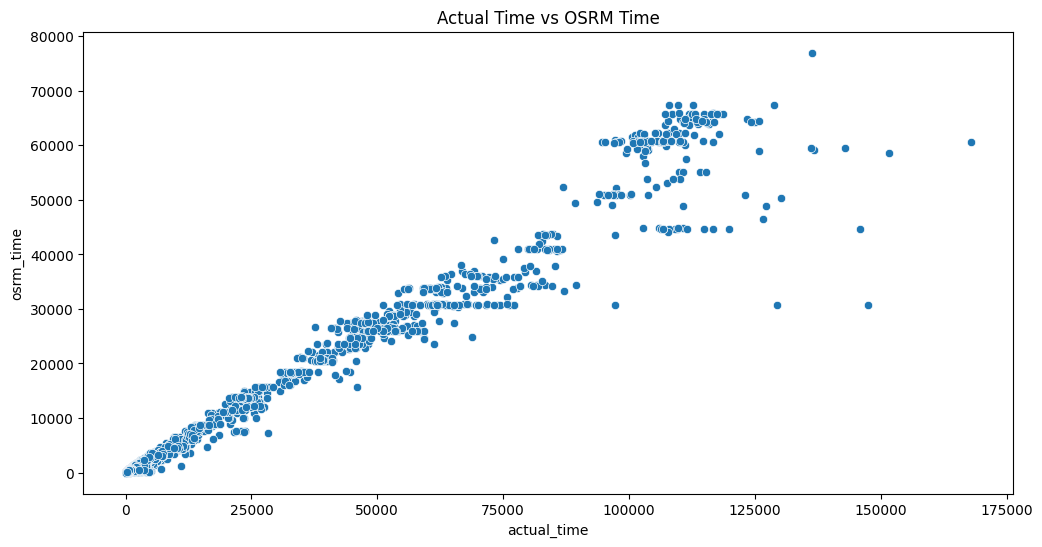

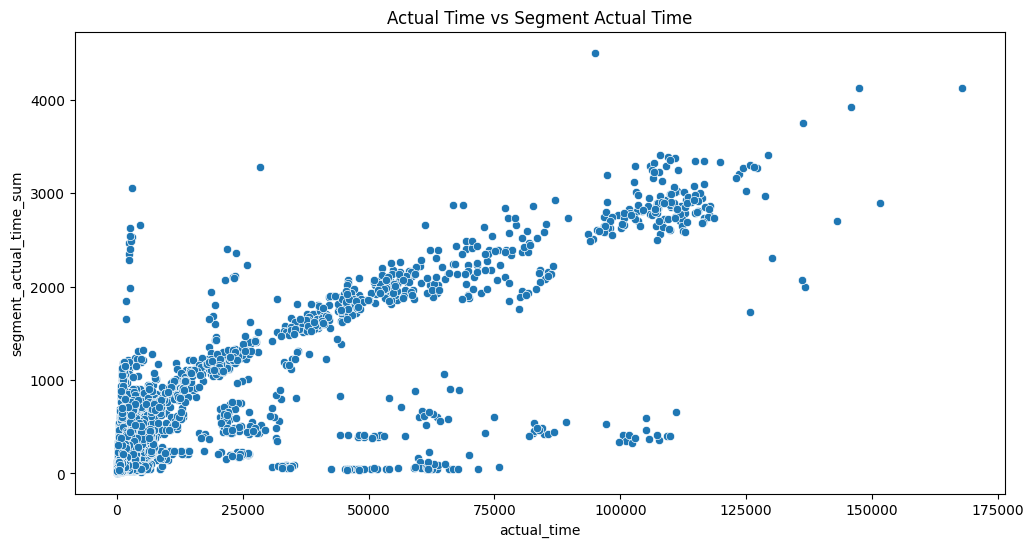

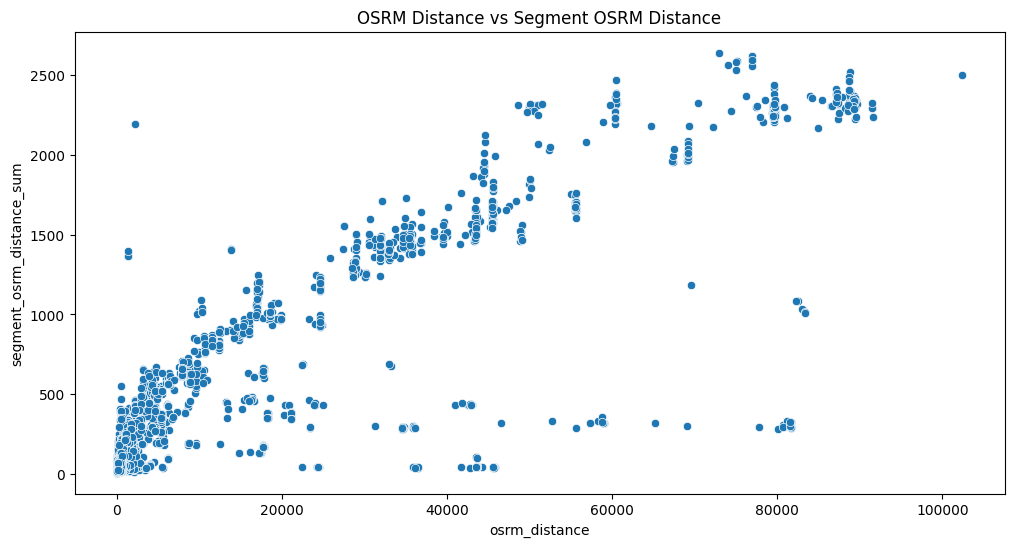

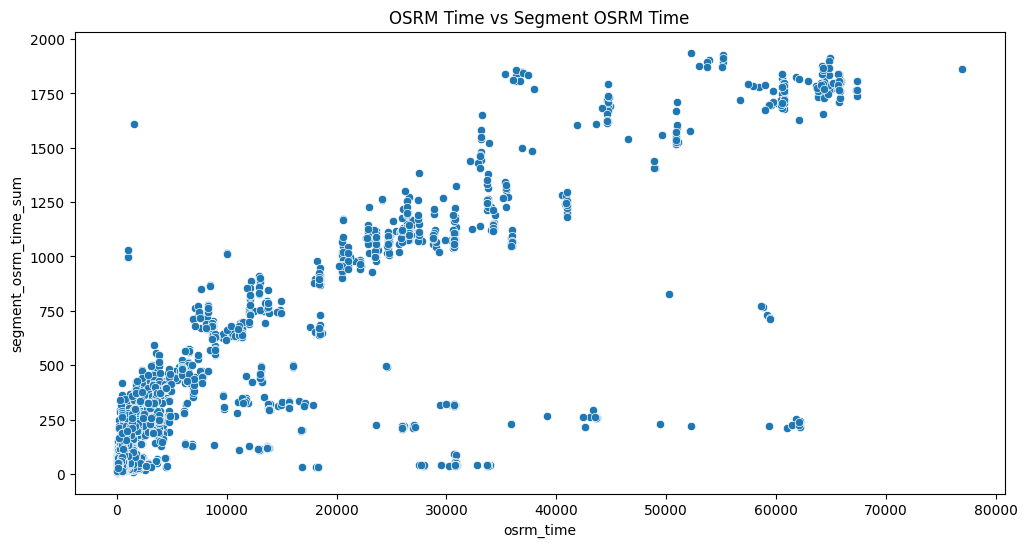

In [226]:
create_trip_dict = {
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time_sum': 'last',
    'segment_osrm_distance_sum': 'last',
    'segment_osrm_time_sum': 'last',
}

# Group by 'trip_uuid' and apply the aggregation functions
df_trip = df_segment.groupby('trip_uuid').agg(create_trip_dict).reset_index()

# Hypothesis Testing
# Function to perform t-test
def perform_ttest(group1, group2, column_name):
    stat, p_value = ttest_ind(group1, group2, nan_policy='omit')
    print(f"T-test for {column_name}:")
    print(f"Statistic: {stat}, P-value: {p_value}")

# Function to perform Mann-Whitney U test (non-parametric alternative to t-test)
def perform_mannwhitneyu(group1, group2, column_name):
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    print(f"Mann-Whitney U test for {column_name}:")
    print(f"Statistic: {stat}, P-value: {p_value}")

# Visual Analysis
def plot_comparisons(df, col1, col2, title):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df[col1], y=df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(title)
    plt.show()

# Perform hypothesis testing
# Compare actual_time and osrm_time
perform_ttest(df_trip['actual_time'], df_trip['osrm_time'], 'actual_time vs osrm_time')
perform_mannwhitneyu(df_trip['actual_time'], df_trip['osrm_time'], 'actual_time vs osrm_time')

# Compare actual_time and segment_actual_time_sum
perform_ttest(df_trip['actual_time'], df_trip['segment_actual_time_sum'], 'actual_time vs segment_actual_time_sum')
perform_mannwhitneyu(df_trip['actual_time'], df_trip['segment_actual_time_sum'], 'actual_time vs segment_actual_time_sum')

# Compare osrm_distance and segment_osrm_distance_sum
perform_ttest(df_trip['osrm_distance'], df_trip['segment_osrm_distance_sum'], 'osrm_distance vs segment_osrm_distance_sum')
perform_mannwhitneyu(df_trip['osrm_distance'], df_trip['segment_osrm_distance_sum'], 'osrm_distance vs segment_osrm_distance_sum')

# Compare osrm_time and segment_osrm_time_sum
perform_ttest(df_trip['osrm_time'], df_trip['segment_osrm_time_sum'], 'osrm_time vs segment_osrm_time_sum')
perform_mannwhitneyu(df_trip['osrm_time'], df_trip['segment_osrm_time_sum'], 'osrm_time vs segment_osrm_time_sum')

# Visual Analysis
plot_comparisons(df_trip, 'actual_time', 'osrm_time', 'Actual Time vs OSRM Time')
plot_comparisons(df_trip, 'actual_time', 'segment_actual_time_sum', 'Actual Time vs Segment Actual Time')
plot_comparisons(df_trip, 'osrm_distance', 'segment_osrm_distance_sum', 'OSRM Distance vs Segment OSRM Distance')
plot_comparisons(df_trip, 'osrm_time', 'segment_osrm_time_sum', 'OSRM Time vs Segment OSRM Time')



In [ ]:
Patterns Observed and Inferences:

a. Orders Origin Analysis:

    Most Frequent Sources: Identify which states or centers are generating the most orders. This helps in understanding key regions driving the majority of the business.
    Insights: High order volume from specific states or centers may indicate strong market presence or customer demand. Conversely, lower volumes could highlight areas needing targeted marketing or improvement.

b. Corridor Analysis:

    Busiest Corridors: Determine which routes or corridors (i.e., combinations of source and destination) have the highest traffic. This can reveal the most critical logistics paths.
    Average Distance: Calculate the average distance traveled along these corridors. Longer average distances might indicate higher costs or logistical challenges.
    Average Time Taken: Analyze the average time taken for trips along these corridors to identify efficiency and potential bottlenecks.

c. Time and Distance Metrics:

    Performance Metrics: Examine metrics like average delivery times and distances. This provides insights into operational efficiency and areas for improvement.
    Trends: Look for trends in delivery times and distances to assess if certain times or conditions affect performance.

2. Actionable Items for the Business:

a. Optimize High-Traffic Regions:

    Improve Efficiency: For regions or corridors with high order volumes, optimize delivery routes and processes to enhance efficiency and reduce costs.
    Resource Allocation: Allocate more resources or improve infrastructure in high-demand areas to meet customer expectations and support growth.

b. Address Bottlenecks:

    Identify Issues: Use the average time and distance metrics to identify bottlenecks in delivery processes. Implement solutions to address these inefficiencies.
    Enhance Operations: Consider technological improvements or process changes to reduce delivery times and costs.

c. Target Marketing and Expansion:

    Focus on High-Demand Areas: Use insights about high-order regions to target marketing efforts and potentially expand operations in those areas.
    Explore New Markets: Analyze regions with lower order volumes for potential growth opportunities or reasons behind lower performance.

d. Continuous Monitoring:

    Track Performance: Regularly monitor key metrics to ensure ongoing efficiency and address any emerging issues promptly.
    Adjust Strategies: Be prepared to adjust strategies based on real-time data and evolving business conditions.

Columns in df_segment:
Index(['segment_key', 'data', 'route_schedule_uuid', 'route_type', 'trip_uuid',
       'source_center', 'destination_center', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time_sum',
       'segment_osrm_distance_sum', 'segment_osrm_time_sum', 'segment_factor',
       'start_scan_to_end_scan', 'od_time_diff_hour', 'destination_city',
       'destination_place', 'destination_code', 'destination_state',
       'source_city', 'source_place', 'source_code', 'source_state', 'days',
       'hours', 'minutes', 'seconds'],
      dtype='object')
Order Counts by Source State:
              source_state  order_count
14               Karnataka         3215
17             Maharashtra         3046
25              Tamil Nadu         1911
10                 Haryana         1830
28           Uttar Pradesh         1782
26               Telangana         1445
3

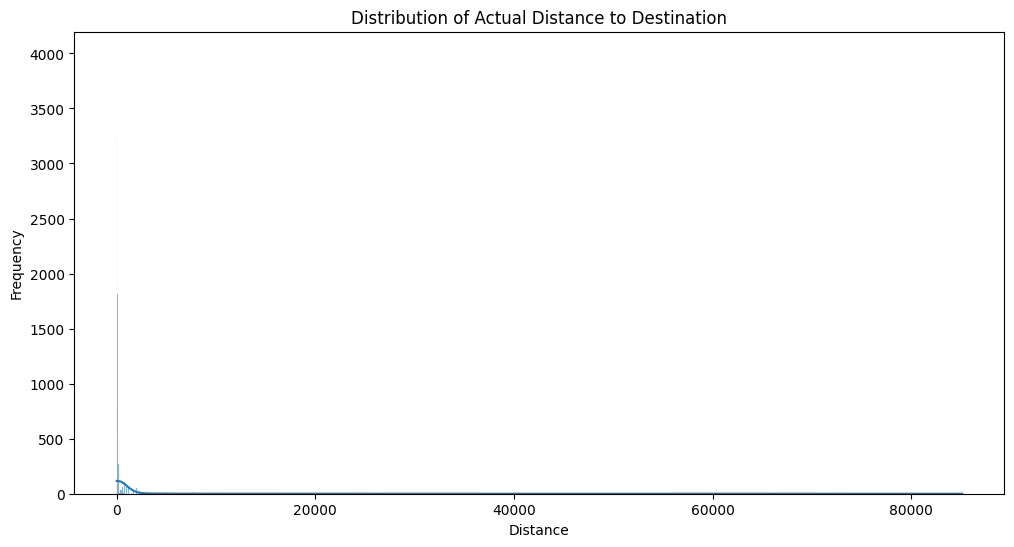

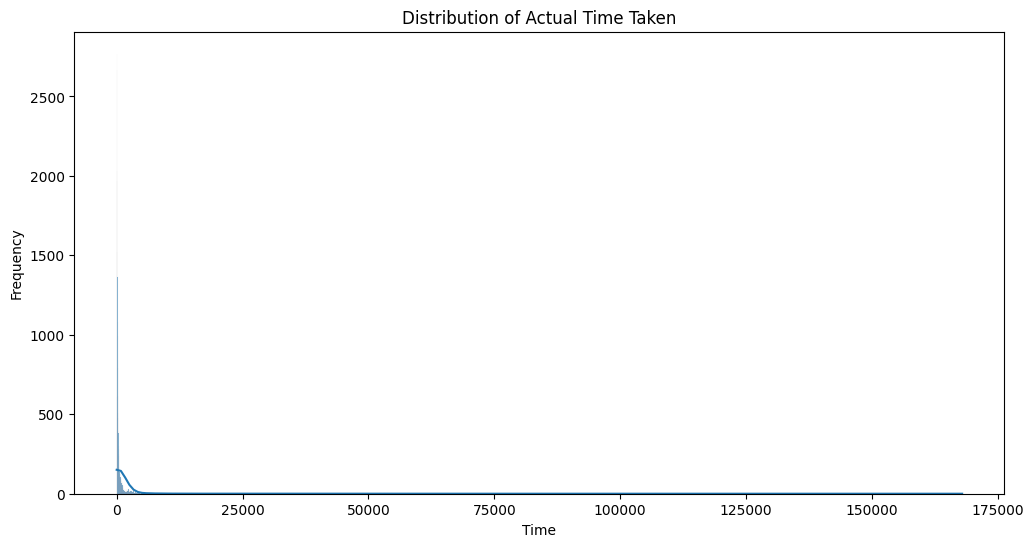

Business Insights & Recommendations:
- Optimize routes along the busiest corridor: Karnataka-Karnataka.
- Focus on states with high order counts for targeted resource allocation.
- Analyze average distances and times to identify cost-saving opportunities.


In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_segment is your DataFrame after segment-level processing

# Ensure 'source_state' and 'destination_state' are available
print("Columns in df_segment:")
print(df_segment.columns)

# Add corridor information
df_segment['corridor'] = df_segment['source_state'] + '-' + df_segment['destination_state']

# 1. Check the most frequent sources

# By State
source_state_counts = df_segment.groupby('source_state').size().reset_index(name='order_count')
source_state_counts = source_state_counts.sort_values(by='order_count', ascending=False)
print("Order Counts by Source State:")
print(source_state_counts)

# By Corridor
corridor_counts = df_segment.groupby('corridor').size().reset_index(name='order_count')
corridor_counts = corridor_counts.sort_values(by='order_count', ascending=False)
print("Order Counts by Corridor:")
print(corridor_counts)

# 2. Find the busiest corridor
busiest_corridor = corridor_counts.iloc[0]
print(f"Busiest Corridor: {busiest_corridor['corridor']} with {busiest_corridor['order_count']} orders")

# 3. Calculate Average Metrics
avg_distance = df_segment['actual_distance_to_destination'].mean()
avg_time = df_segment['actual_time'].mean()

print(f"Average Distance between Source and Destination: {avg_distance:.2f}")
print(f"Average Time Taken: {avg_time:.2f}")

# Visualize the distribution of orders
plt.figure(figsize=(12, 6))
sns.histplot(df_segment['actual_distance_to_destination'], kde=True)
plt.title('Distribution of Actual Distance to Destination')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_segment['actual_time'], kde=True)
plt.title('Distribution of Actual Time Taken')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

# Business Insights
print("Business Insights & Recommendations:")
print(f"- Optimize routes along the busiest corridor: {busiest_corridor['corridor']}.")
print(f"- Focus on states with high order counts for targeted resource allocation.")
print(f"- Analyze average distances and times to identify cost-saving opportunities.")


In [ ]:
Business Insights & Recommendations:
- Optimize routes along the busiest corridor: Karnataka-Karnataka.
- Focus on states with high order counts for targeted resource allocation.
- Analyze average distances and times to identify cost-saving opportunities.